## KELOMPOK 1 ( Pendeteksian Pola Penipuan dalam SMS Menggunakan Metode Text Mining )


1. Amalia Rahma Puteri (23031554152)
2. Frista Reynata Budi Atmaja (23031554154)
3. Maria Sisilia Sangu (23031554168)
4. Angelica Rosa Yuniva  (23031554209)



# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **EDA Sebelum Pre-Processing**

In [ ]:
data = pd.read_csv('dataset_sms_akhir.csv', on_bad_lines='skip')
data.head()

,teks,label
0,Oopss.. Saat ini pulsamu Rp 0. Yuk isi pulsa a...,2
1,"Boost kuota mu biar mood makin good, caranya? ...",2
2,Cuma 100 Perak bisa Nelpon SEPUASNYA ke semua ...,2
3,"Cara mudah dpt HOT PROMO:\n1. *123*60#\n2.WA, ...",1
4,"Cara mudah dpt HOT PROMO:\n1. *123*60#\n2.WA, ...",1


## **Ringkasan Data**

In [ ]:
# Menampilkan informasi ringkas tentang data
print("Jumlah data:", len(data))
print("Label unik:", data['label'].unique())
print("Jumlah pesan unik:", data['teks'].nunique())
print("Jumlah duplikat:", data.duplicated().sum())
print("Missing values:\n", data.isnull().sum())

Jumlah data: 11131
Label unik: [2 1 0]
Jumlah pesan unik: 2538
Jumlah duplikat: 8593
Missing values:
 teks     0
label    0
dtype: int64


## **Statistik Panjang Karakter dan Kata**




In [ ]:
# Calculate character count
data['char_count'] = data['teks'].apply(len)

# Calculate word count
data['word_count'] = data['teks'].apply(lambda x: len(str(x).split()))

# Now you can print the statistics
print("\nStatistik karakter & kata:")
print(data[['char_count', 'word_count']].describe())


Statistik karakter & kata:
         char_count    word_count
count  11131.000000  11131.000000
mean     130.198994     19.969095
std       29.171323      4.427223
min        1.000000      1.000000
25%      116.000000     16.000000
50%      144.000000     21.000000
75%      145.000000     22.000000
max      550.000000     77.000000


## **Visualisasi Distribusi Label**

<ipython-input-18-3f96d824b013>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='Set2')


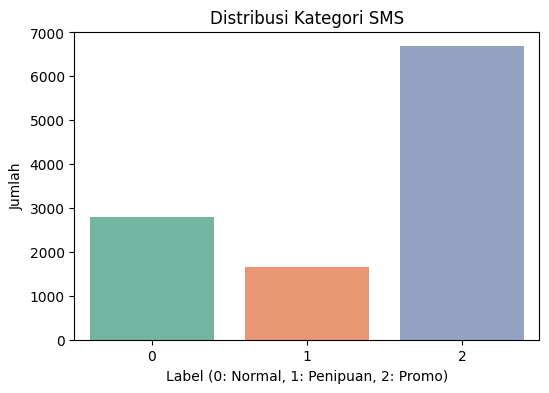

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=data, palette='Set2')
plt.title('Distribusi Kategori SMS')
plt.xlabel('Label (0: Normal, 1: Penipuan, 2: Promo)')
plt.ylabel('Jumlah')
plt.show()


## **Boxplot Panjang Pesan per Label**



<ipython-input-19-9586918dadb8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='char_count', data=data, palette='Set3')
<ipython-input-19-9586918dadb8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='word_count', data=data, palette='Set3')


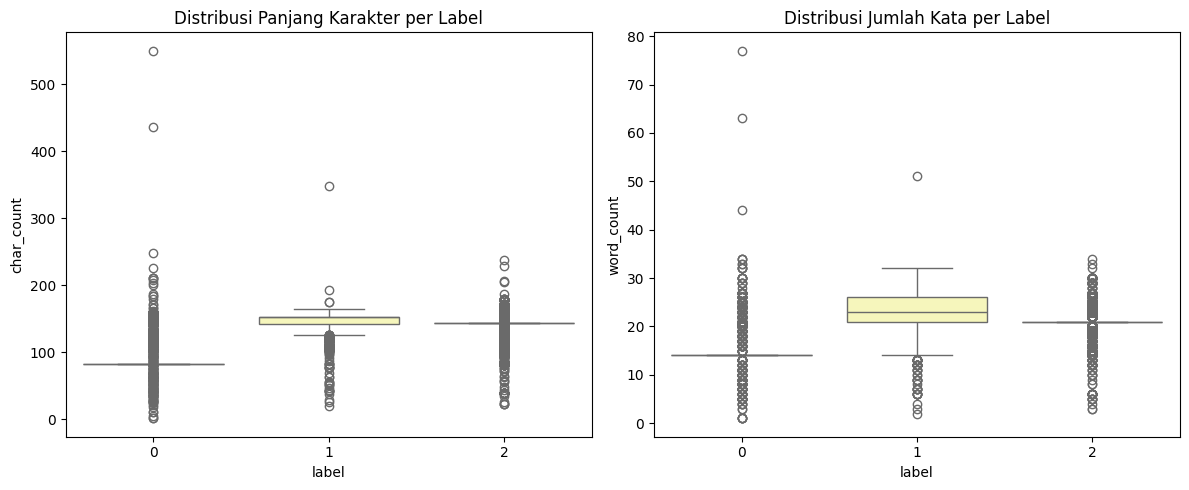

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.boxplot(x='label', y='char_count', data=data, palette='Set3')
plt.title('Distribusi Panjang Karakter per Label')

plt.subplot(1, 2, 2)
sns.boxplot(x='label', y='word_count', data=data, palette='Set3')
plt.title('Distribusi Jumlah Kata per Label')

plt.tight_layout()
plt.show()

### **Top Kata Paling Umum (tanpa preprocessing)**



In [ ]:
# Fungsi untuk mengambil kata paling sering muncul
def top_words(texts, n=15):
    all_words = ' '.join(texts).split()
    counter = Counter(all_words)
    return counter.most_common(n)

# Tampilkan top 15 kata
print("\nTop kata di seluruh dataset:")
print(top_words(data['teks']))



Top kata di seluruh dataset:
[('pulsa', 13461), ('kuota', 8885), ('di', 6463), ('tidak', 6219), ('maaf', 6212), ('Mohon', 6210), ('atau', 5330), ('utk', 4433), ('anda', 4317), ('Anda', 4203), ('hub', 4098), ('cukup.', 4089), ('&', 4060), ('*505#', 3810), ('Dapatkan', 3793)]


## **WordCloud untuk Semua SMS**


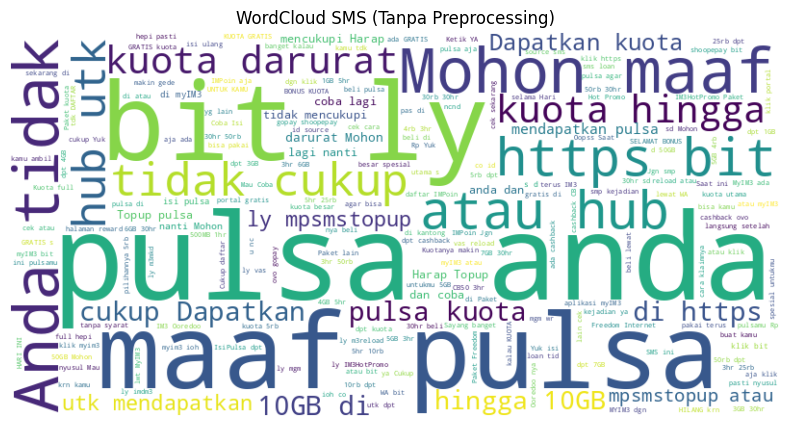

In [ ]:
text_all = " ".join(data['teks'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud SMS (Tanpa Preprocessing)')
plt.show()


## **Outlier Pesan (Terlalu Pendek & Panjang)**

In [ ]:
# Tampilkan SMS terpendek dan terpanjang berdasarkan jumlah karakter
print("\nPesan terpendek:")
print(data.sort_values(by='char_count').head(3)[['teks', 'char_count']])

print("\nPesan terpanjang:")
print(data.sort_values(by='char_count', ascending=False).head(3)[['teks', 'char_count']])



Pesan terpendek:
      teks  char_count
6710     t           1
6832     t           1
6699  test           4

Pesan terpanjang:
                                                    teks  char_count
6499   Tolong dibantu sampaikan Peringatan Kpd Eko Yu...         550
10987  pesan dari nama1 : Assalamu'alaikum wr.wb. Pak...         436
11095  untuk dwm soal klasifikasi, algoritma yang men...         348


# **Preprocessing Text**

## **Case Folding**

In [ ]:
import re

# membuat fungsi untuk case folding
def casefolding(text):
    text = text.lower()                                 # merubah kalimat menjadi huruf kecil
    text = re.sub(r'https?://\S+|www\.\S+', '', text)   # menghapus url dari kalimat
    text = re.sub(r'[-+]?[0-9]+', '', text)              # menghapus angka dari kalimat
    text = re.sub(r'[^\w\s]', '', text)                 # menghapus tanda baca
    text = text.strip()
    return text

## **Word Normalization**

In [ ]:
key_norm = pd.read_csv('key_norm.csv')

def text_normalize(text):
    text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0]
    if (key_norm['singkat'] == word).any()
    else word for word in text.split()])

    text = str.lower(text)
    return text

## **Filtering (Stopword Removal)**

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [ ]:
len(stopwords_ind)

758

In [ ]:
# membuat fungsi stopword removal

# menambahkan kata dalam stopword
more_stopword = ['tsel', 'gb', 'rb', 'btw']
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_word(text):
    clean_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)

## **Stemming**

In [ ]:
!pip -q install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 14.0 MB/s eta 0:00:00


In [ ]:
# merubah kata menjadi kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# membuat fungsi untuk stemming bahasa indonesia
def stemming(text):
    text = stemmer.stem(text)
    return text

# **Preprocessing Text Pipeline**

In [ ]:
# membuat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
    # Periksa apakah input adalah string, ubah ke string jika bukan
    if isinstance(text, (int, float)):
        text = str(text)
    text = casefolding(text)
    text = text_normalize(text)
    text = remove_stop_word(text)
    text = stemming(text)
    return text

In [ ]:
data['clean_teks']= data['teks'].apply(text_preprocessing_process)

In [ ]:
data

,teks,label,char_count,word_count,clean_teks
0,Oopss.. Saat ini pulsamu Rp 0. Yuk isi pulsa a...,2,152,25,oopss pulsa rupiah yuk isi pulsa pakai im oore...
1,"Boost kuota mu biar mood makin good, caranya? ...",2,150,24,boost kuota mu biar mood good pakai nomor indo...
2,Cuma 100 Perak bisa Nelpon SEPUASNYA ke semua ...,2,129,24,perak telpon puas nomor im ayo cek paket lho
3,"Cara mudah dpt HOT PROMO:\n1. *123*60#\n2.WA, ...",1,158,20,mudah hot promo wa klik bitlyimhotpromo myim a...
4,"Cara mudah dpt HOT PROMO:\n1. *123*60#\n2.WA, ...",1,158,20,mudah hot promo wa klik bitlyimhotpromo myim a...
...,...,...,...,...,...
11126,"Yooo sama2, oke nanti aku umumin di grup kelas,0",0,48,9,yooo oke umumin grup kelas
11127,😁 sebelumnya ga ad nulis kerudung. Kirain warn...,1,54,9,nulis kerudung kirain warna jins
11128,"Mba mau kirim 300 ya,0",2,22,5,mbak kirim ya
11129,nama1 beaok bwrangkat pagi...mau cas atay tra...,0,53,7,nama beaok bwrangkat pagimau cas atay tranfer


In [ ]:
# Menyimpan data yang sudah dipreprocessing ke dalam file csv
data.to_csv('clean_dataset.csv')
print("data bersih sudah disimpan")

data bersih sudah disimpan


# **EDA Setelah Pre-Processing**

In [ ]:
# Load file hasil preprocessing
clean_data = pd.read_csv("clean_dataset.csv")
clean_data.head()

,Unnamed: 0,teks,label,char_count,word_count,clean_teks
0,0,Oopss.. Saat ini pulsamu Rp 0. Yuk isi pulsa a...,2,152,25,oopss pulsa rupiah yuk isi pulsa pakai im oore...
1,1,"Boost kuota mu biar mood makin good, caranya? ...",2,150,24,boost kuota mu biar mood good pakai nomor indo...
2,2,Cuma 100 Perak bisa Nelpon SEPUASNYA ke semua ...,2,129,24,perak telpon puas nomor im ayo cek paket lho
3,3,"Cara mudah dpt HOT PROMO:\n1. *123*60#\n2.WA, ...",1,158,20,mudah hot promo wa klik bitlyimhotpromo myim a...
4,4,"Cara mudah dpt HOT PROMO:\n1. *123*60#\n2.WA, ...",1,158,20,mudah hot promo wa klik bitlyimhotpromo myim a...


 ## **Ringkasan Dataset**

In [ ]:
# Cek struktur data
print("Jumlah data:", len(clean_data))
print("Label unik:", clean_data['label'].unique())
print("Jumlah pesan unik:", clean_data['teks'].nunique())
print("Jumlah duplikat:", clean_data.duplicated().sum())
print("Missing values:\n", clean_data.isnull().sum())

Jumlah data: 11131
Label unik: [2 1 0]
Jumlah pesan unik: 2538
Jumlah duplikat: 0
Missing values:
 Unnamed: 0    0
teks          0
label         0
char_count    0
word_count    0
clean_teks    3
dtype: int64


## **Statistik Deskriptif Panjang Pesan (Setelah Preprocessing)**

In [ ]:
print(clean_data[['char_count', 'word_count']].describe())


         char_count    word_count
count  11131.000000  11131.000000
mean     130.198994     19.969095
std       29.171323      4.427223
min        1.000000      1.000000
25%      116.000000     16.000000
50%      144.000000     21.000000
75%      145.000000     22.000000
max      550.000000     77.000000


## **Visualisasi Distribusi Panjang Pesan per Label**

<ipython-input-37-2c35ea3ebbd3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='char_count', data=clean_data, palette='Set2')
<ipython-input-37-2c35ea3ebbd3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='word_count', data=clean_data, palette='Set2')


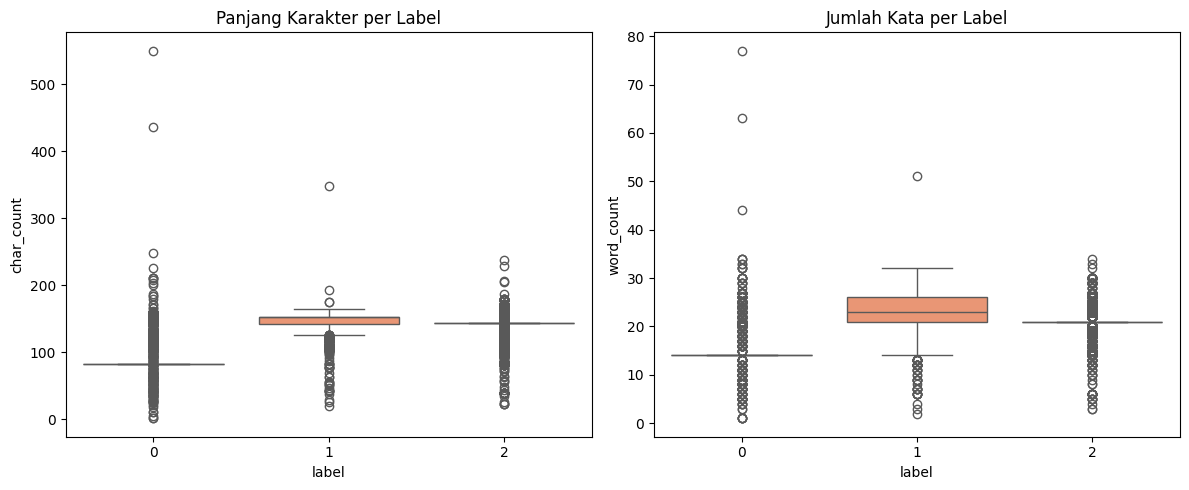

In [ ]:
plt.figure(figsize=(12,5))

# Panjang karakter
plt.subplot(1, 2, 1)
sns.boxplot(x='label', y='char_count', data=clean_data, palette='Set2')
plt.title('Panjang Karakter per Label')

# Panjang kata
plt.subplot(1, 2, 2)
sns.boxplot(x='label', y='word_count', data=clean_data, palette='Set2')
plt.title('Jumlah Kata per Label')

plt.tight_layout()
plt.show()


## **WordCloud per Label (Untuk Melihat Kata Khas)**

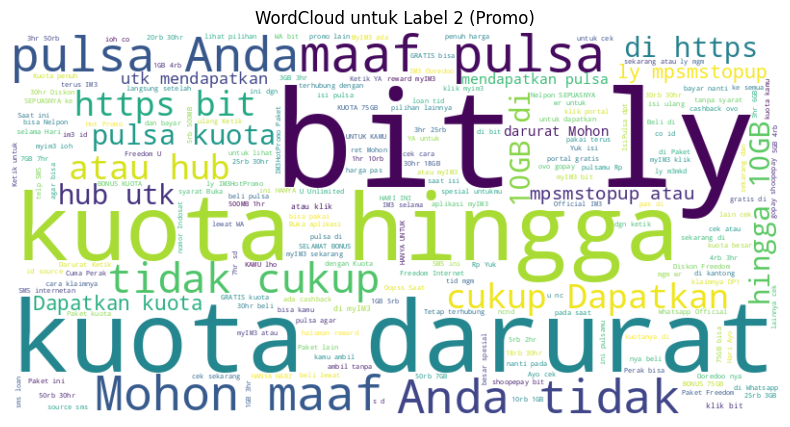

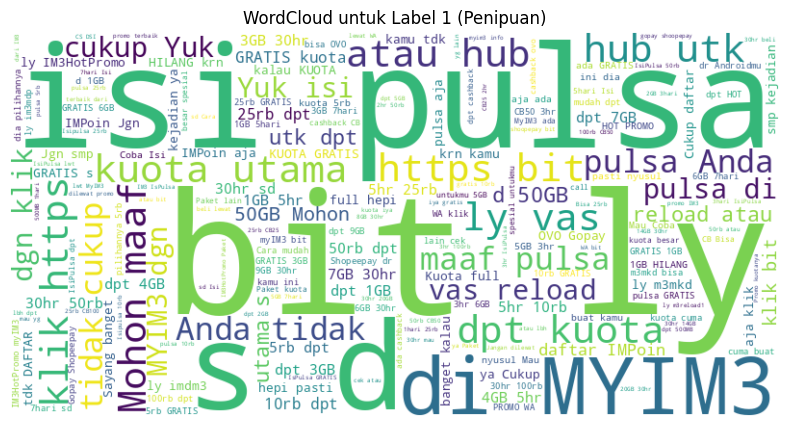

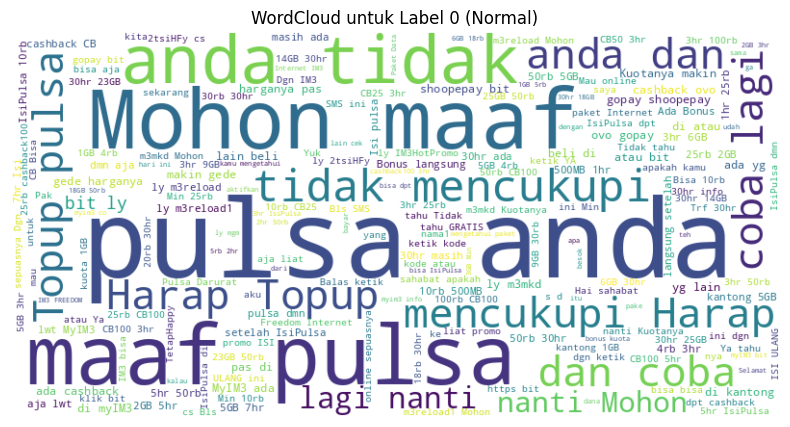

In [ ]:
from wordcloud import WordCloud

# Loop untuk tiap label
for label in clean_data['label'].unique():
    label_text = " ".join(clean_data[clean_data['label'] == label]['teks'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(label_text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    label_name = {0: 'Normal', 1: 'Penipuan', 2: 'Promo'}
    plt.title(f'WordCloud untuk Label {label} ({label_name[label]})')
    plt.show()


## **Frekuensi Kata Terbanyak (Setelah Preprocessing)**

In [ ]:
from collections import Counter

def top_words_by_label(df, label, n=15):
    all_words = " ".join(df[df['label'] == label]['teks']).split()
    counter = Counter(all_words)
    return counter.most_common(n)

# Tampilkan top kata untuk masing-masing label
for label in clean_data['label'].unique():
    label_name = {0: 'Normal', 1: 'Penipuan', 2: 'Promo'}
    print(f"\nTop {label_name[label]} SMS Words:")
    print(top_words_by_label(clean_data, label))



Top Promo SMS Words:
[('kuota', 8200), ('pulsa', 7865), ('di', 5469), ('atau', 4602), ('utk', 3978), ('&', 3960), ('*505#', 3795), ('Dapatkan', 3776), ('hingga', 3759), ('Anda', 3758), ('10GB', 3724), ('mendapatkan', 3698), ('tidak', 3690), ('hub', 3684), ('Mohon', 3683)]

Top Penipuan SMS Words:
[('dpt', 1850), ('pulsa', 1301), ('GRATIS', 749), ('klik:', 695), ('kuota', 620), ('30hr', 612), ('s.d', 606), ('di', 597), ('atau', 543), ('5hr', 496), ('dgn', 469), ('Isi', 457), ('isi', 444), ('Anda', 437), ('25rb', 435)]

Top Normal SMS Words:
[('pulsa', 4295), ('anda', 4242), ('dan', 2157), ('lagi', 2129), ('tidak', 2123), ('maaf', 2122), ('Harap', 2118), ('coba', 2118), ('Mohon', 2117), ('mencukupi.', 2117), ('Topup', 2117), ('nanti.', 2117), ('di', 397), ('ada', 255), ('atau', 185)]


## **Analisis Outlier Pasca Preprocessing**

In [ ]:
print("\nSMS terpendek setelah preprocessing:")
print(clean_data.sort_values(by='char_count').head(3)[['teks', 'char_count']])

print("\nSMS terpanjang setelah preprocessing:")
print(clean_data.sort_values(by='char_count', ascending=False).head(3)[['teks', 'char_count']])



SMS terpendek setelah preprocessing:
      teks  char_count
6710     t           1
6832     t           1
6699  test           4

SMS terpanjang setelah preprocessing:
                                                    teks  char_count
6499   Tolong dibantu sampaikan Peringatan Kpd Eko Yu...         550
10987  pesan dari nama1 : Assalamu'alaikum wr.wb. Pak...         436
11095  untuk dwm soal klasifikasi, algoritma yang men...         348


## **Korelasi Panjang vs Label**

In [ ]:
# Korelasi sederhana
corr_char = clean_data[['char_count', 'label']].corr()
corr_word = clean_data[['word_count', 'label']].corr()

print("Korelasi panjang karakter vs label:")
print(corr_char)

print("\nKorelasi jumlah kata vs label:")
print(corr_word)


Korelasi panjang karakter vs label:
            char_count     label
char_count    1.000000  0.649195
label         0.649195  1.000000

Korelasi jumlah kata vs label:
            word_count     label
word_count    1.000000  0.484896
label         0.484896  1.000000


# **Feature Engineering**

In [ ]:
# pisahkan kolom feature dan target
x = data['clean_teks']
y = data['label']

In [ ]:
x

,clean_teks
0,oopss pulsa rupiah yuk isi pulsa pakai im oore...
1,boost kuota mu biar mood good pakai nomor indo...
2,perak telpon puas nomor im ayo cek paket lho
3,mudah hot promo wa klik bitlyimhotpromo myim a...
4,mudah hot promo wa klik bitlyimhotpromo myim a...
...,...
11126,yooo oke umumin grup kelas
11127,nulis kerudung kirain warna jins
11128,mbak kirim ya
11129,nama beaok bwrangkat pagimau cas atay tranfer


In [ ]:
y

,label
0,2
1,2
2,2
3,1
4,1
...,...
11126,0
11127,1
11128,2
11129,0


# **Feature Extraction (TF-IDF dan N-Gram)**

In [ ]:
# save model
import pickle

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#Unigram
vec_TF_IDF = TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(x)

x_tf_idf = vec_TF_IDF.transform(x)

pickle.dump(vec_TF_IDF.vocabulary_,open("feature_tf-idf.sav", "wb"))

In [ ]:
# menampilkan vocabulary dari tif-idf
vec_TF_IDF.vocabulary_

{'oopss': 2005,
 'pulsa': 2254,
 'rupiah': 2424,
 'yuk': 3107,
 'isi': 1213,
 'pakai': 2043,
 'im': 1122,
 'ooredoonya': 2008,
 'beli': 271,
 'myim': 1791,
 'klik': 1411,
 'portal': 2189,
 'gratis': 1000,
 'boost': 448,
 'kuota': 1477,
 'mu': 1761,
 'biar': 293,
 'mood': 1750,
 'good': 986,
 'nomor': 1931,
 'indosat': 1171,
 'telpsmsinternetan': 2807,
 'otomatis': 2021,
 'mbak': 1657,
 'perak': 2108,
 'telpon': 2805,
 'puas': 2241,
 'ayo': 195,
 'cek': 534,
 'paket': 2046,
 'lho': 1554,
 'mudah': 1762,
 'hot': 1079,
 'promo': 2225,
 'wa': 3029,
 'bitlyimhotpromo': 356,
 'app': 127,
 'bitlymmkd': 385,
 'ovogopay': 2028,
 'androidmu': 106,
 'hidup': 1061,
 'santuy': 2459,
 'full': 894,
 'hepi': 1057,
 'nyusulisi': 1966,
 'cashback': 524,
 'coba': 584,
 'rbcb': 2318,
 'sd': 2477,
 'fullhepi': 895,
 'nyusullgak': 1967,
 'percayaliat': 2113,
 'deh': 675,
 'isipulsa': 1214,
 'gbhari': 938,
 'harga': 1035,
 'pas': 2067,
 'kantong': 1325,
 'rbhr': 2325,
 'internetan': 1193,
 'gas': 931,
 'teru

In [ ]:
# melihat jumlah fitur
print(len(vec_TF_IDF.get_feature_names_out()))

3121


In [ ]:
# melihat fitur apa saja yang ada di dalam corpus
print(vec_TF_IDF.get_feature_names_out())

['aa' 'aamiin' 'abadi' ... 'zhoudis' 'zona' 'zxhdwo']


In [ ]:
#menampilkan data tabular

x1 = vec_TF_IDF.transform(x).toarray()
data_tabular_tf_idf = pd.DataFrame(x1,columns=vec_TF_IDF.get_feature_names_out())
data_tabular_tf_idf

,aa,aamiin,abadi,abah,abai,abangselvi,abiem,acara,account,activated,...,yuniawati,yuniawatiutk,zanet,zenly,zflip,zfold,zhafara,zhoudis,zona,zxhdwo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_tabular_tf_idf.iloc[20:50,70:100]

,alfamart,alfamidi,algoritma,alhabib,alih,all,allah,allo,allopaylater,alon,...,ambyar,amil,amin,amizahtarif,ampunbangjago,ampuun,an,anak,and,anda
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Feature Selection**

In [ ]:
# Menjadikan array
x_train = np.array(data_tabular_tf_idf)
y_train = np.array(y)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k=2000)
x_kbest_features = chi2_features.fit_transform(x_train, y_train)

# untuk reduced features
print('Original Feature Number', x_train.shape[1])
print('Reduced feature Number', x_kbest_features.shape[1])

Original Feature Number 3121
Reduced feature Number 2000


In [ ]:
Data = pd.DataFrame(chi2_features.scores_,columns=['Nilai'])
Data

,Nilai
0,1.671023
1,1.146289
2,0.937802
3,0.206714
4,14.022263
...,...
3116,1.686283
3117,0.230868
3118,4.520222
3119,0.377973


In [ ]:
# menampilkan feature beserta nilainya

feature = vec_TF_IDF.get_feature_names_out()
feature

Data['Fitur'] = feature
Data

,Nilai,Fitur
0,1.671023,aa
1,1.146289,aamiin
2,0.937802,abadi
3,0.206714,abah
4,14.022263,abai
...,...,...
3116,1.686283,zfold
3117,0.230868,zhafara
3118,4.520222,zhoudis
3119,0.377973,zona


In [ ]:
# mengurutkan nilai feature terbaik
Data.sort_values(by='Nilai', ascending=False)

,Nilai,Fitur
1033,2626.512705,harap
2897,2625.042150,topup
627,2624.204628,cukup
584,2211.433255,coba
2477,1083.697743,sd
...,...,...
96,0.068556,an
396,0.044378,bitlyplaywbr
568,0.023478,cinta
2123,0.014274,period


In [ ]:
mask = chi2_features.get_support()
mask

array([ True,  True,  True, ...,  True, False, False])

In [ ]:
# menampilkan fitur yang terpilih berdsarkan nilai mask atau nilai tertinggi yang sudah ditetapkan pada chi square

new_feature=[]
for bool, f in zip(mask, feature):
    if bool :
        new_feature.append(f)
    selected_feature=new_feature
selected_feature

['aa',
 'aamiin',
 'abadi',
 'abai',
 'abiem',
 'acara',
 'account',
 'adam',
 'adapter',
 'adapundi',
 'adison',
 'adl',
 'admd',
 'admin',
 'admindeposit',
 'aduh',
 'ae',
 'afifah',
 'agam',
 'agen',
 'agunansurvey',
 'ahaha',
 'ahmad',
 'air',
 'airport',
 'ajahh',
 'ajaliat',
 'ajalwt',
 'ajar',
 'ajatonton',
 'aju',
 'ajurintan',
 'aktif',
 'aktifin',
 'aktivasi',
 'aktivitas',
 'aku',
 'akulaku',
 'akun',
 'akurasi',
 'aky',
 'alaikum',
 'alam',
 'alamat',
 'algoritma',
 'all',
 'allah',
 'allo',
 'allopaylater',
 'alur',
 'alvia',
 'aman',
 'amanah',
 'amazon',
 'ambek',
 'ambil',
 'amin',
 'ampuun',
 'anak',
 'anda',
 'andal',
 'android',
 'androidmu',
 'anggunansurvey',
 'anggunn',
 'anna',
 'anti',
 'apa',
 'apaapa',
 'api',
 'aplikasi',
 'apollo',
 'app',
 'apps',
 'appstore',
 'apr',
 'area',
 'arengnya',
 'asalamuallaikum',
 'asiikkk',
 'asik',
 'asikk',
 'asmaratarif',
 'ass',
 'assalammualaikum',
 'assalammualaikumpie',
 'assalammualaikuum',
 'assalamu',
 'assalamualaik

In [ ]:
# membuat vocabulary baru berdasarkan fitur yang terseleksi

new_selected_feature = {}

for (k,v) in vec_TF_IDF.vocabulary_.items():
    if k in selected_feature:
        new_selected_feature[k]=v

new_selected_feature

{'oopss': 2005,
 'pulsa': 2254,
 'rupiah': 2424,
 'yuk': 3107,
 'isi': 1213,
 'pakai': 2043,
 'im': 1122,
 'ooredoonya': 2008,
 'beli': 271,
 'myim': 1791,
 'klik': 1411,
 'portal': 2189,
 'gratis': 1000,
 'boost': 448,
 'kuota': 1477,
 'mu': 1761,
 'biar': 293,
 'mood': 1750,
 'good': 986,
 'nomor': 1931,
 'indosat': 1171,
 'telpsmsinternetan': 2807,
 'otomatis': 2021,
 'mbak': 1657,
 'perak': 2108,
 'telpon': 2805,
 'puas': 2241,
 'ayo': 195,
 'cek': 534,
 'paket': 2046,
 'lho': 1554,
 'mudah': 1762,
 'hot': 1079,
 'promo': 2225,
 'wa': 3029,
 'bitlyimhotpromo': 356,
 'app': 127,
 'bitlymmkd': 385,
 'androidmu': 106,
 'hidup': 1061,
 'full': 894,
 'hepi': 1057,
 'cashback': 524,
 'coba': 584,
 'rbcb': 2318,
 'sd': 2477,
 'fullhepi': 895,
 'nyusullgak': 1967,
 'percayaliat': 2113,
 'deh': 675,
 'isipulsa': 1214,
 'gbhari': 938,
 'harga': 1035,
 'pas': 2067,
 'kantong': 1325,
 'rbhr': 2325,
 'internetan': 1193,
 'gas': 931,
 'terusim': 2836,
 'kasih': 1333,
 'putusmauisi': 2274,
 'rbca

In [ ]:
len(new_selected_feature)

2000

In [ ]:
pickle.dump(new_selected_feature,open("new_selected_feature_tf-idf.sav","wb"))

In [ ]:
# menampilkan fitur-fitur yang sudah diseleksi

data_selected_feature = pd.DataFrame(x_kbest_features, columns=selected_feature)
data_selected_feature

,aa,aamiin,abadi,abai,abiem,acara,account,adam,adapter,adapundi,...,your,youtube,yudisium,yuk,yukajukan,yuniawati,zanet,zflip,zfold,zhoudis
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.249154,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
11127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
11128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
11129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## **Modeling**

In [ ]:
selected_x = x_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# import library
import random
from sklearn.model_selection import train_test_split
# import algoritma SVM
from sklearn.svm import SVC


In [ ]:
x = selected_x
y = data.label

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# menampilkan jumlah data training dan data testing
print('Banyaknya X_train : ', len(x_train))
print('Banyaknya X_test : ', len(x_test))
print( "Banyaknya Y_train : ", len(y_train))
print("Banyaknya Y_test :" ,len(y_test))

Banyaknya X_train :  8904
Banyaknya X_test :  2227
Banyaknya Y_train :  8904
Banyaknya Y_test : 2227


In [ ]:
# proses training menggunakan SVM
text_algorithm = SVC(kernel='linear')


In [ ]:
model = text_algorithm.fit(x_train, y_train)

In [ ]:
import pickle

pickle.dump(model, open("model_svm_sms.sav", "wb"))


## **Evaluasi Model**

In [ ]:
# masukan library yg dibutuhkan
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
predicted = model.predict(x_test)
CM = confusion_matrix(y_test, predicted)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       548
           1       0.94      0.88      0.91       328
           2       0.95      0.99      0.97      1351

    accuracy                           0.96      2227
   macro avg       0.96      0.93      0.94      2227
weighted avg       0.96      0.96      0.96      2227



In [ ]:
pickle.dump(model,open("model_fraud.sav","wb" ))